In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
    

In [3]:
#importing file
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')


In [4]:
df.shape


(11251, 15)

In [5]:
df.info


<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [8]:
#dropping unnecessary columns
df.drop(["Status" , "unnamed1"], axis=1, inplace = True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
#droppind NUll values
df.dropna(inplace = True)

In [16]:
df["Amount"].dtypes

dtype('float64')

In [17]:
#coverting data type
df["Amount"] = df["Amount"].astype('int')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Data Analysis Based On Certain Attributes 

In [ ]:
# 1 Gender - 
#Potting a bar chart on the basis of gender and it's count

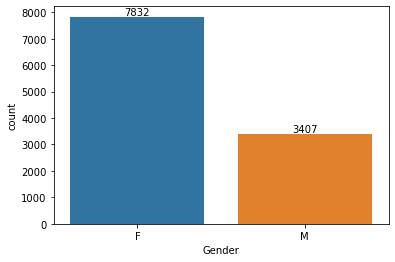

In [28]:
GenX  = sns.countplot(x = 'Gender', data = df)

for i in GenX.containers:
    GenX.bar_label(i)

In [31]:
#Total Amount Spent by a Gender 
df.groupby(['Gender'], as_index= False) ['Amount'].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


In [ ]:
#2 Age Group - Lets find out Which Age group has bought the most number of items

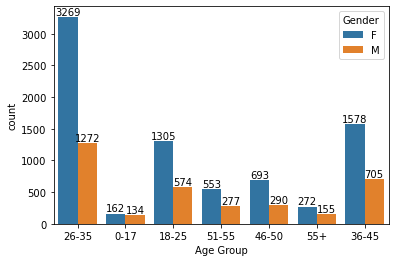

In [36]:
Agex = sns.countplot(x = 'Age Group', data = df , hue = 'Gender')

for i in Agex.containers:
    Agex.bar_label(i)


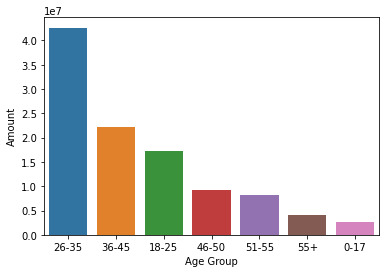

In [54]:
Age = df.groupby(['Age Group'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
ax = sns.barplot(x = 'Age Group',y = 'Amount' , data = Age)


In [ ]:
#3 State Sale Report
# Total no. Orders by States

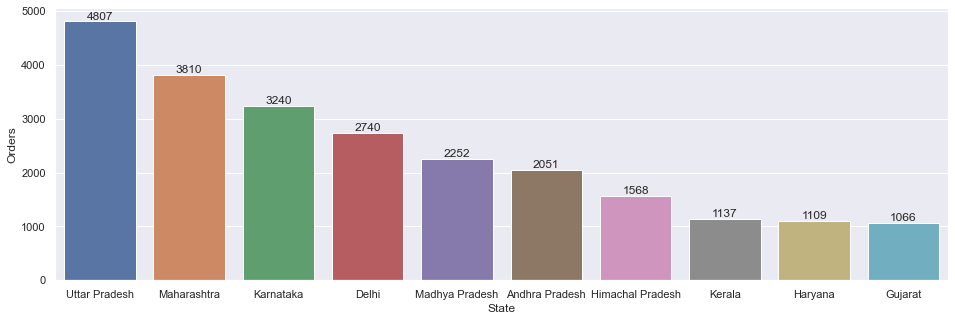

In [67]:
States = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
a = sns.barplot(data = States, x = 'State', y = 'Orders')
for i in a.containers:
    a.bar_label(i)
    

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


In [104]:
df.groupby(['State','Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)


,State,Product_Category,Orders
214,Uttar Pradesh,Food,1406
161,Maharashtra,Food,1191
211,Uttar Pradesh,Clothing & Apparel,1186
114,Karnataka,Footwear & Shoes,841
158,Maharashtra,Clothing & Apparel,827
37,Delhi,Footwear & Shoes,823
113,Karnataka,Food,714
4,Andhra Pradesh,Electronics & Gadgets,684
81,Himachal Pradesh,Clothing & Apparel,624
213,Uttar Pradesh,Electronics & Gadgets,574


In [ ]:
#4 Occupation

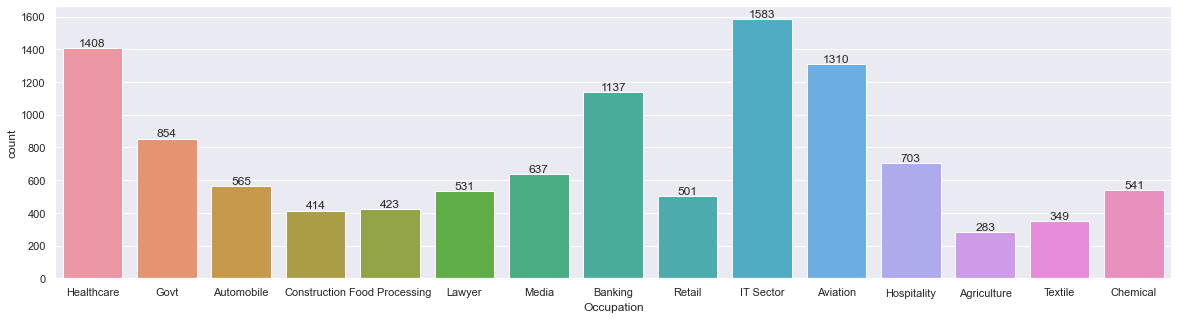

In [72]:
sns.set(rc={'figure.figsize':(20,5)})  
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [74]:
df.groupby(['Occupation'], as_index= False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

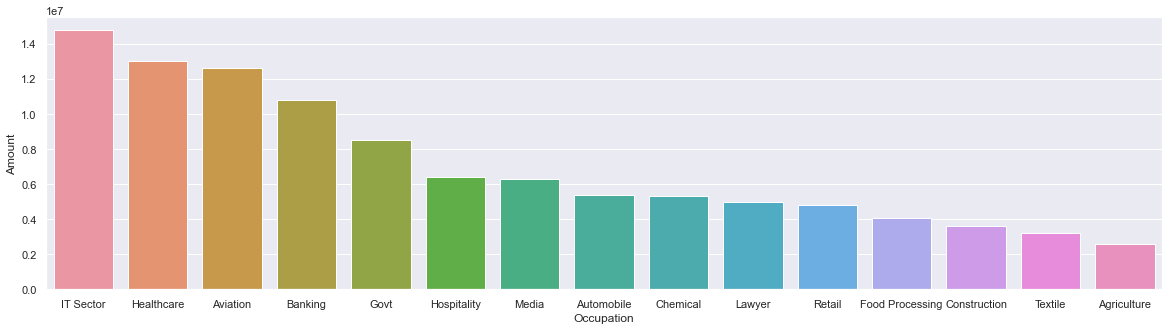

In [78]:
Sales_State = df.groupby(['Occupation'], as_index= False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(20,5)})  
sns.barplot(data = Sales_State, x = 'Occupation', y = 'Amount')


In [ ]:
#Product category Sales Report

In [87]:
df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)


,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

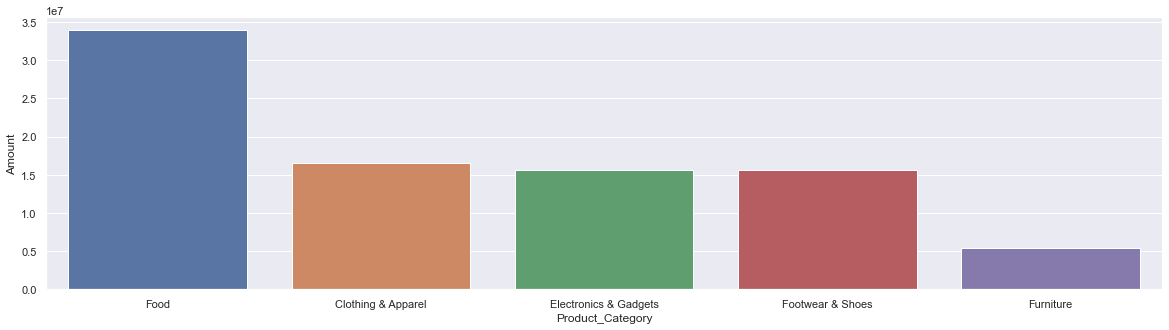

In [88]:
PC = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)
sns.barplot(x = 'Product_Category', y = 'Amount', data = PC)

In [97]:
df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by= 'Orders',ascending = False).head(10)

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

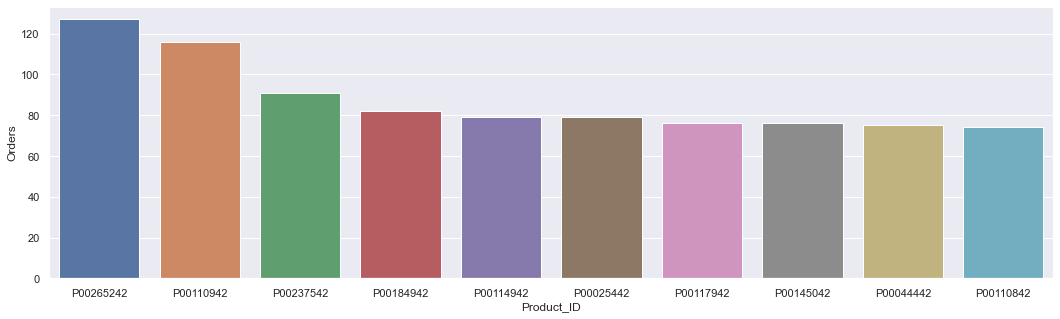

In [102]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')


# Conclusion

Women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

Top 10 Products are - 
P00265242,
P00110942,
P00237542,
P00184942,
P00114942,
P00025442,
P00117942,
P00145042,
P00044442,
P00110842


